In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
from patsy import cr 
from pygam import LinearGAM, s

In [2]:
auto = pd.read_csv('auto.csv')
auto

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
387,393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


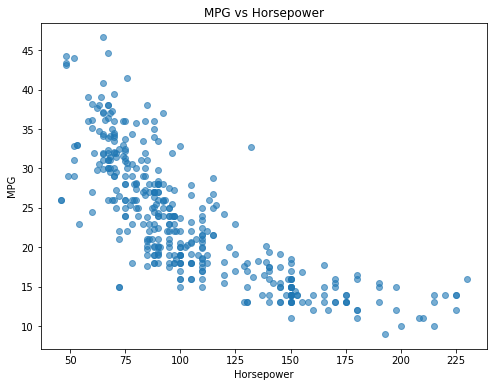

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(auto['horsepower'], auto['mpg'], alpha=0.6)
plt.title('MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

In [4]:
#Linear Model
X = sm.add_constant(auto['horsepower']) 
y = auto['mpg']

In [5]:
degree_1 = smf.ols('mpg ~ horsepower', data=auto).fit()   
print(degree_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        21:50:04   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

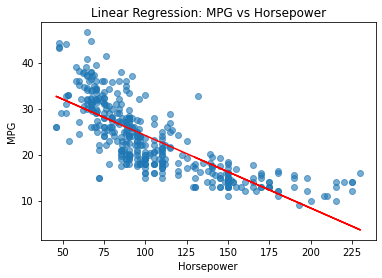

In [6]:
plt.scatter(auto['horsepower'], auto['mpg'], alpha=0.6)
plt.plot(auto['horsepower'], degree_1.fittedvalues, color='red')
plt.title('Linear Regression: MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

In [7]:
#Polynomial Regression with quadratic, cubic, quartic and quintic  
degree_2 = smf.ols('mpg ~ horsepower + I(horsepower**2)', data=auto).fit()
degree_3 = smf.ols('mpg ~ horsepower + I(horsepower**2) + I(horsepower**3)', data=auto).fit()
degree_4 = smf.ols('mpg ~ horsepower + I(horsepower**2) + I(horsepower**3) + I(horsepower**4)', data=auto).fit()
degree_5 = smf.ols('mpg ~ horsepower + I(horsepower**2) + I(horsepower**3) + I(horsepower**4) + I(horsepower**5)', data=auto).fit() 

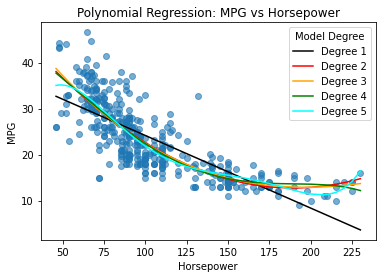

In [9]:
auto_sorted = auto.sort_values('horsepower')
plt.scatter(auto_sorted['horsepower'], auto_sorted['mpg'], alpha=0.6)
plt.plot(auto_sorted['horsepower'], degree_1.predict(auto_sorted), color='black', label='Degree 1')
plt.plot(auto_sorted['horsepower'], degree_2.predict(auto_sorted), color='red', label='Degree 2')
plt.plot(auto_sorted['horsepower'], degree_3.predict(auto_sorted), color='orange', label='Degree 3')
plt.plot(auto_sorted['horsepower'], degree_4.predict(auto_sorted), color='green', label='Degree 4')
plt.plot(auto_sorted['horsepower'], degree_5.predict(auto_sorted), color='cyan', label='Degree 5')
plt.title('Polynomial Regression: MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend(title='Model Degree', loc='best')
plt.show()

In [10]:
for i, model in enumerate([degree_1, degree_2, degree_3, degree_4, degree_5], start=1):
    y_true = auto_sorted['mpg']
    y_pred = model.predict(auto_sorted)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"Degree {i}: MSE = {mse:.3f}, R² = {r2:.3f}")

Degree 1: MSE = 23.944, R² = 0.606
Degree 2: MSE = 18.985, R² = 0.688
Degree 3: MSE = 18.945, R² = 0.688
Degree 4: MSE = 18.876, R² = 0.689
Degree 5: MSE = 18.427, R² = 0.697


In [11]:
spline3 = smf.ols('mpg ~ cr(horsepower, df=3)', data=auto).fit()
spline4 = smf.ols('mpg ~ cr(horsepower, df=4)', data=auto).fit()
spline6 = smf.ols('mpg ~ cr(horsepower, df=6)', data=auto).fit()
spline10 = smf.ols('mpg ~ cr(horsepower, df=10)', data=auto).fit()
spline16 = smf.ols('mpg ~ cr(horsepower, df=16)', data=auto).fit()

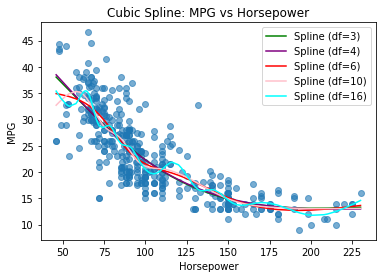

In [12]:
plt.scatter(auto_sorted['horsepower'], auto_sorted['mpg'], alpha=0.6)
plt.plot(auto_sorted['horsepower'], spline3.predict(auto_sorted), color = "green", label='Spline (df=3)')
plt.plot(auto_sorted['horsepower'], spline4.predict(auto_sorted), color = "purple", label='Spline (df=4)')
plt.plot(auto_sorted['horsepower'], spline6.predict(auto_sorted), color = "red", label='Spline (df=6)')
plt.plot(auto_sorted['horsepower'], spline10.predict(auto_sorted), color = "pink", label='Spline (df=10)')
plt.plot(auto_sorted['horsepower'], spline16.predict(auto_sorted), color = "cyan", label='Spline (df=16)')
plt.title('Cubic Spline: MPG vs Horsepower')
plt.xlabel('Horsepower'); plt.ylabel('MPG')
plt.legend()
plt.show()

In [13]:
for df in [3, 4, 6, 10, 16]:
    model = smf.ols(f'mpg ~ cr(horsepower, df={df})', data=auto).fit()
    y_pred = model.predict(auto)
    mse = mean_squared_error(auto['mpg'], y_pred)
    r2 = r2_score(auto['mpg'], y_pred)
    print(f"Spline df={df}: MSE={mse:.3f}, R²={r2:.3f}")

Spline df=3: MSE=18.818, R²=0.690
Spline df=4: MSE=18.836, R²=0.690
Spline df=6: MSE=18.183, R²=0.701
Spline df=10: MSE=17.836, R²=0.706
Spline df=16: MSE=17.168, R²=0.717


In [25]:
X_gam = auto[['horsepower', 'weight', 'acceleration']].astype(float).to_numpy()
y = auto['mpg'].to_numpy()

gam = LinearGAM(s(0) + s(1) + s(2)).gridsearch(X_gam, y)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:000:00


In [26]:
base = np.median(X_gam, axis=0)
xg_hp = np.linspace(X_gam[:,0].min(), X_gam[:,0].max(), 300)
XX_hp = np.tile(base, (len(xg_hp), 1))
XX_hp[:,0] = xg_hp

y_pred = gam.predict(XX_hp)

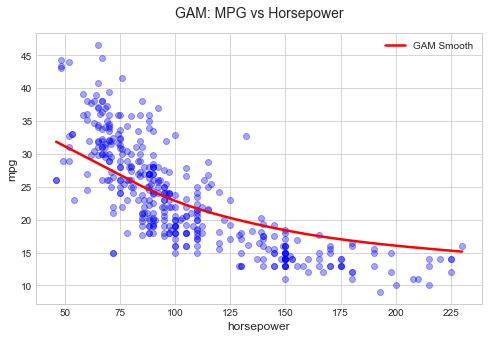

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(auto['horsepower'], auto['mpg'], color='blue', alpha=0.35, label='_nolegend_')
plt.plot(xg_hp, y_pred, color='red', linewidth=2.5, label='GAM Smooth')

plt.title('GAM: MPG vs Horsepower', fontsize=14, pad=15)
plt.xlabel('horsepower', fontsize=12)
plt.ylabel('mpg', fontsize=12)
plt.legend(frameon=False, loc='best')
plt.show()